In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [38]:
# Import necessary libraries
# Installing necessary libraries
!pip install moviepy
!pip install moviepy
!pip install gradio
!pip install langchain
!pip install transformers
!pip install pandas
!pip install numpy 
!pip install langchain_community
!pip install moviepy
!pip install openai
!pip install os
!pip install numpy
!pip install dateime
!pip install os
!pip install diffusers
!pip install torch
!pip install editor
!pip install dalle
!pip install gtts
!pip install gtts
!pip install spacy

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
ERROR: Could not find a version that satisfies the requirement dateime (from versions: none)
ERROR: No matching distribution found for dateime
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
ERROR: Could not find a version that satisfies the requirement dalle (from versions: none)
ERROR: No matching distribution found for dalle


In [39]:
import requests
import time
import os
from datetime import datetime
import json
# from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import torch
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import gtts  # For text-to-speech audio generation
import moviepy.editor as mp
import re
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import os
import torch
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, AutoModelForTokenClassification
import gtts  # For text-to-speech audio generation
# from langchain_community import LangChain  # For implementing langchain and other NLP tasks

In [40]:
# Load Spacy model for better NLP processing
nlp = spacy.load("en_core_web_sm")

def nlp_pipeline(text, data):
    # Use T5 for summarization
    summary_model = AutoModelForSeq2SeqLM.from_pretrained('t5-base')
    summary_tokenizer = AutoTokenizer.from_pretrained('t5-base')

    # Prepare input
    input_text = f"summarize: {text} {data}"
    inputs = summary_tokenizer.encode(input_text, return_tensors='pt', max_length=512, truncation=True)

    # Generate summary
    outputs = summary_model.generate(inputs, max_length=100)
    summary_text = summary_tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Extract percentages and categories using Spacy for better accuracy
    doc = nlp(text)
    percentages = []
    categories = []
    current_category = None

    for token in doc:
        if token.like_num and '%' in token.text:
            percentages.append(int(token.text.replace('%', '')))
            if current_category:
                categories.append(current_category)
                current_category = None
        elif token.pos_ == 'NOUN' or token.pos_ == 'PROPN':
            if not current_category:
                current_category = token.text
            else:
                current_category += f" {token.text}"

    if current_category:
        categories.append(current_category)

    if not percentages or not categories:
        percentages = [100]
        categories = ['Summary']

    # Generate audio
    tts = gtts.gTTS(summary_text, lang='en')
    tts.save('summary_audio.mp3')

    return {
        'categories': categories,
        'values': percentages,
        'text': summary_text
    }

In [41]:
# Define a function to generate infographics from custom prompt and CSV file
def generate_infographics_from_prompt_and_csv(prompt, csv_file):
    # Use the NLP pipeline to process the prompt and CSV file
    summary = nlp_pipeline(prompt, pd.read_csv(csv_file)['Category'].tolist())

    # Integrate with AI models like GPT-3 for more dynamic and interactive visualizations
    # Assuming GPT-3 is available and can generate images based on the summary
    # For demonstration, we'll use matplotlib for a simple visualization
    fig, ax = plt.subplots()
    ax.bar(summary['categories'], summary['values'])
    ax.set_title('Infographics from CSV and Prompt')
    ax.set_xlabel('Category')
    ax.set_ylabel('Value')
    plt.savefig('infographics_image.png')
    images = ['infographics_image.png']

    # Create a video from the images using moviepy
    from moviepy.editor import ImageSequenceClip
    clip = ImageSequenceClip(images, fps=1)
    clip.write_videofile('infographics_video.mp4')

In [42]:
def create_animated_gif(text):
    import os
    from PIL import Image
    import matplotlib.pyplot as plt
    import shutil  # For directory removal

    # Use the NLP pipeline to process the text
    summary = nlp_pipeline(text, '')
    categories = summary['categories']
    values = summary['values']

    # Create frames directory
    frames_dir = 'animation_frames'
    if os.path.exists(frames_dir):
        shutil.rmtree(frames_dir)  # Remove directory if it exists
    os.makedirs(frames_dir)

    def create_frame(frame_number, value_multiplier, categories=categories, values=values):
        fig, ax = plt.subplots(figsize=(12, 7))

        # Calculate current height of bars
        current_values = [v * value_multiplier for v in values]

        # Create bars with current height
        bars = ax.bar(categories, current_values, color='skyblue')

        # Styling
        ax.set_title('Market Share Analysis', fontsize=20, pad=20)
        ax.set_xlabel('Brands', fontsize=14)
        ax.set_ylabel('Percentage (%)', fontsize=14)
        ax.set_ylim(0, max(values) * 1.2)

        # Add value labels
        for bar, value in zip(bars, current_values):
            if value > 0:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(value)}%',
                       ha='center', va='bottom', fontsize=12)

        ax.grid(True, axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()

        # Save frame
        frame_path = os.path.join(frames_dir, f'frame_{frame_number:03d}.png')
        plt.savefig(frame_path, dpi=300, bbox_inches='tight')
        plt.close()
        return frame_path

    # Generate frames
    frames = []
    num_frames = 20  # Number of frames for animation

    print("Generating frames...")
    for i in range(num_frames + 1):
        multiplier = i / num_frames
        frame_path = create_frame(i, multiplier)
        frames.append(frame_path)

    # Create GIF
    print("Creating GIF...")
    images = [Image.open(f) for f in frames]

    gif_path = 'generated_images_animated_infographic.gif'
    images[0].save(
        gif_path,
        save_all=True,
        append_images=images[1:],
        duration=100,  # 100ms between frames
        loop=0
    )

    # Clean up frames directory
    try:
        shutil.rmtree(frames_dir)
        print("Cleanup completed successfully")
    except Exception as e:
        print(f"Cleanup error: {e}")

    print(f"Animation saved as GIF: {gif_path}")
    return gif_path

In [43]:
def create_detailed_infographic(text):
    """
    Creates a static detailed infographic for data storytelling
    """
    import matplotlib.pyplot as plt

    # Process text
    summary = nlp_pipeline(text, '')
    categories = summary['categories']
    values = summary['values']

    # Create figure with subplots
    fig = plt.figure(figsize=(15, 10))

    # Main bar plot
    ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
    bars = ax1.bar(categories, values, color='skyblue')
    ax1.set_title('Market Share Distribution', fontsize=16)
    ax1.set_ylabel('Percentage (%)')

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}%',
                ha='center', va='bottom')

    # Pie chart
    ax2 = plt.subplot2grid((2, 2), (1, 0))
    ax2.pie(values, labels=categories, autopct='%1.1f%%')
    ax2.set_title('Market Share Proportion')

    # Additional insights text
    ax3 = plt.subplot2grid((2, 2), (1, 1))
    ax3.axis('off')
    total = sum(values)
    insights_text = f"""Key Insights:

    • Total market coverage: {total}%
    • Leading brand: {categories[values.index(max(values))]}
    • Market share gap: {max(values)-min(values)}%
    """
    ax3.text(0, 0.5, insights_text, fontsize=12, va='center')

    plt.tight_layout()

    # Save high-quality image
    output_path = 'detailed_infographic.png'
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.close()

    print(f"Detailed infographic saved as: {output_path}")
    return output_path

In [44]:
def convert_gif_to_storytelling_video(gif_path, text):
    """
    Converts a GIF into a storytelling video using imageio
    """
    import os
    from PIL import Image, ImageDraw, ImageFont
    import numpy as np
    import imageio

    # Process text for insights
    summary = nlp_pipeline(text, '')
    categories = summary['categories']
    values = summary['values']

    def create_text_frame(text, size=(1920, 1080), bg_color='white'):
        img = Image.new('RGB', size, color=bg_color)
        draw = ImageDraw.Draw(img)

        try:
            font = ImageFont.truetype("arial.ttf", 60)
        except:
            font = ImageFont.load_default()

        # Get text bbox
        bbox = draw.textbbox((0, 0), text, font=font)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]

        # Center text
        x = (size[0] - text_width) // 2
        y = (size[1] - text_height) // 2

        draw.text((x, y), text, fill='black' if bg_color == 'white' else 'white', font=font)
        # Convert to RGB numpy array
        return np.array(img.convert('RGB'))

    # Prepare frames
    frames = []
    fps = 30

    # 1. Title sequence (2 seconds)
    title_frame = create_text_frame("Market Share Analysis", bg_color='black')
    for _ in range(2 * fps):
        frames.append(title_frame)

    # 2. GIF sequence (4 seconds)
    gif = Image.open(gif_path)
    gif_frames = []
    try:
        while True:
            frame = gif.copy()
            # Resize frame and ensure RGB
            frame = frame.convert('RGB').resize((1920, 1080), Image.LANCZOS)
            # Convert to numpy array
            frame_array = np.array(frame)
            gif_frames.append(frame_array)
            gif.seek(len(gif_frames))
    except EOFError:
        pass

    # Extend gif frames to 4 seconds
    frames_needed = 4 * fps
    while len(gif_frames) < frames_needed:
        gif_frames.extend(gif_frames)
    frames.extend(gif_frames[:frames_needed])

    # 3. Explanation sequence (4 seconds)
    explanations = [
        "Analyzing market share data...",
        f"Main competitor: {categories[values.index(max(values))]} leads with {max(values)}%",
        f"Market gap analysis shows {max(values)-min(values)}% difference",
        f"Total market coverage: {sum(values)}%",
        "Generating insights and recommendations..."
    ]

    frames_per_explanation = int((4 * fps) / len(explanations))
    for exp in explanations:
        exp_frame = create_text_frame(exp)
        for _ in range(frames_per_explanation):
            frames.append(exp_frame)

    # Verify all frames have same shape and channels
    frame_shape = frames[0].shape
    frames = [frame.reshape(frame_shape) if frame.shape != frame_shape else frame
             for frame in frames]

    # Save as MP4
    output_path = 'data_storytelling_video.mp4'

    print("Writing video...")
    writer = imageio.get_writer(output_path, fps=fps)
    for frame in frames:
        writer.append_data(frame)
    writer.close()

    print(f"Data storytelling video saved as: {output_path}")
    return output_path

In [45]:
# Step 1: Generate Background using Stable Diffusion (Placeholder)
def generate_background():
    # For now, we'll use a placeholder image. Replace with actual call to Stable Diffusion.
    background_image = "background.png"  # Replace this with the actual image generation logic
    return background_image

In [46]:
# Step 2: Generate Animated Pie Chart using Matplotlib and MoviePy
def create_animated_pie_chart(data, output_video_path="animated_pie_chart.mp4"):
    if not data["Category"] or not data["Percentage"]:
        print("No data to create the pie chart.")
        return

    fig, ax = plt.subplots(figsize=(8, 6))
    categories = data["Category"]
    percentages = data["Percentage"]

    # Create an 'explode' list with 0.1 for the first slice and 0 for the rest
    explode = [0.1] + [0] * (len(categories) - 1)  # Explode first slice, others stay normal

    # Define the function to animate the pie chart
    def update(num):
        ax.clear()  # Clear the axis for each frame

        # Slice the data according to the current frame
        current_data = percentages[:num+1]
        current_labels = categories[:num+1]

        ax.pie(current_data,
               labels=current_labels,
               autopct='%1.1f%%',
               startangle=90,
               shadow=True,
               explode=explode[:num+1],  # Exploding progressively
               wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

        ax.set_title("Market Share Distribution", fontsize=14)

    ani = animation.FuncAnimation(fig, update, frames=len(categories), repeat=False, interval=1000)

    # Save the animation as a video
    ani.save(output_video_path, writer='ffmpeg', fps=1)
    return output_video_path

In [47]:
# Step 3: Generate Narration from Data
def generate_narration(data):
    narration = "This infographic displays the market share Data storytelling through prompt data."
    for category, percentage in zip(data["Category"], data["Percentage"]):
        narration += f" {category} holds {percentage}% of the market share."
    return narration

In [48]:
# Step 4: Generate Audio from Narration Text using gTTS (Google Text-to-Speech)
def generate_audio_from_text(narration_text, audio_file_path="narration.mp3"):
    tts = gtts.gTTS(narration_text)
    tts.save(audio_file_path)

In [49]:
# Step 5: Add Narration Audio to Video using MoviePy
def add_auto_generated_audio_to_video(video_path, audio_file_path, output_video_path):
    video_clip = mp.VideoFileClip(video_path)
    audio_clip = mp.AudioFileClip(audio_file_path)

    # Set the audio of the video clip to the generated narration
    video_clip = video_clip.set_audio(audio_clip)

    # Write the final video with the audio
    video_clip.write_videofile(output_video_path, codec="libx264", audio_codec="aac")

In [50]:
# Function to parse user input
def parse_user_input(user_input):
    # Use regular expressions to extract categories and percentages
    pattern = r"(\d+)%.*?(\w+)"
    matches = re.findall(pattern, user_input)

    categories = []
    percentages = []

    for match in matches:
        percentage, category = match
        categories.append(category)
        percentages.append(float(percentage))

    return {"Category": categories, "Percentage": percentages}

In [51]:
# Main Function to Create Infographic Video with Auto-Generated Narration and Audio
def create_infographic_video():
    # Prompt the user for data input
    user_input = input("Enter the market share data (e.g., 'in the phone industry 20% sales are of the iPhone and 30% sales are of the Samsung'): ")
    data = parse_user_input(user_input)

    if not data["Category"] or not data["Percentage"]:
        print("No valid data extracted from the input.")
        return

    # Step 1: Generate Background using Stable Diffusion (Placeholder)
    background_image = generate_background()

    # Step 2: Generate Animated Pie Chart with Data
    pie_chart_video = "animated_pie_chart.mp4"
    create_animated_pie_chart(data, pie_chart_video)

    # Step 3: Generate Narration from Data
    narration_text = generate_narration(data)
    print(f"Generated Narration: {narration_text}")

    # Step 4: Generate Audio from Narration Text
    generate_audio_from_text(narration_text, audio_file_path="narration.mp3")

    # Step 5: Add Narration Audio to Video
    final_video = "final_infographic_video.mp4"
    add_auto_generated_audio_to_video(pie_chart_video, audio_file_path="narration.mp3", output_video_path=final_video)

    print("Infographic video created successfully!")

In [52]:
# Function to determine the scenario based on the prompt
def determine_scenario(user_input):
    # Define keywords for different scenarios
    keywords = {
        "market_share": [
            "market", "share", "sales", "percentage", "revenue", "profit", "competition",
            "industry", "sector", "segment", "brand", "product", "service", "company",
            "business", "enterprise", "firm", "organization", "corporation", "venture",
            "trade", "commerce", "economy", "finance", "investment", "stock", "equity",
            "buy", "sell", "purchase", "transaction", "deal", "contract", "agreement",
            "distribution", "channel", "retail", "wholesale", "e-commerce", "online",
            "offline", "store", "shop", "outlet", "mall", "marketplace", "platform",
            "advertising", "marketing", "promotion", "campaign", "strategy", "tactic",
            "trend", "analysis", "report", "study", "research", "data", "insight",
            "graph", "chart", "diagram", "table", "spreadsheet", "dashboard", "KPI",
            "metric", "indicator", "benchmark", "evaluation", "review", "survey"
        ],
        "customer_demographics": [
            "age", "gender", "location", "region", "city", "state", "country",
            "income", "occupation", "job", "profession", "education", "marital status",
            "population", "group", "ethnicity", "culture", "religion", "belief", "values",
            "household", "family", "children", "adults", "seniors", "youth", "millennials",
            "generation", "habits", "lifestyle", "preferences", "choices", "tastes",
            "demographics", "age", "gender", "income", "education", "occupation",
                                  "marital status", "family size", "household", "ethnicity", "race", "religion",
                                  "language", "nationality", "citizenship", "residence", "location", "region",
                                  "country", "state", "city", "town", "village", "neighborhood", "community",
                                  "population", "census", "survey", "poll", "questionnaire", "interview", "focus group",
                                  "segmentation", "targeting", "profiling", "persona", "avatar", "archetype", "stereotype",
                                  "psychographics", "behavior", "attitude", "belief", "value", "lifestyle", "culture",
                                  "socioeconomic", "economic status", "social class", "stratification", "hierarchy",
                                  "generation", "cohort", "peer group", "social network", "community", "society",
                                  "culture", "tradition", "custom", "practice", "ritual", "ceremony", "festival",
                                  "holiday", "celebration", "event", "occasion", "gathering", "meeting", "conference",
                                  "seminar", "workshop", "webinar", "symposium", "colloquium", "convention", "exhibition",
                                  "trade show", "fair", "expo", "congress", "summit", "forum", "panel", "roundtable",
                                  "dialogue", "discussion", "debate", "brainstorming", "ideation", "innovation",
                                  "creativity", "problem solving", "decision making", "leadership", "management",
                                  "organization", "structure", "hierarchy", "bureaucracy", "governance", "policy",
                                  "regulation", "compliance", "ethics", "morality", "values", "principles", "standards",
                                  "guidelines", "procedures", "protocols", "practices", "methods", "techniques", "tools",
                                  "resources", "assets", "capital", "funding", "grant", "subsidy", "loan", "credit",
                                  "debt", "liability", "equity", "investment", "portfolio", "diversification", "hedging",
                                  "risk management", "insurance", "warranty", "guarantee", "assurance", "promise",
                                  "commitment", "obligation", "responsibility", "accountability", "transparency", "integrity",
                                  "honesty", "trust", "confidence", "reliability", "dependability", "consistency", "stability",
                                  "growth", "development", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard",
                                  "benchmark", "criterion", "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition", "aspiration",
                                  "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support", "assistance",
                                  "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health",
                                  "fitness", "nutrition", "diet", "exercise", "sport", "athletics", "physical activity", "recreation",
                                  "hobby", "interest", "passion", "enthusiasm", "excitement", "thrill", "adventure", "exploration",
                                  "discovery", "learning", "education", "knowledge", "wisdom", "intelligence", "insight", "understanding",
                                  "comprehension", "grasp", "mastery", "expertise", "skill", "ability", "talent", "gift", "aptitude",
                                  "potential", "capacity", "capability", "competence", "proficiency", "adeptness", "prowess", "virtuosity",
                                  "brilliance", "genius", "ingenuity", "creativity", "innovation", "invention", "discovery", "breakthrough",
                                  "revolution", "transformation", "change", "evolution", "development", "growth", "progress", "advancement",
                                  "improvement", "enhancement", "optimization", "refinement", "perfection", "excellence", "quality", "standard",
                                  "benchmark", "criterion", "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid", "relief", "comfort", "ease", "convenience", "satisfaction", "happiness", "joy",
                                  "pleasure", "entertainment", "recreation", "leisure", "relaxation", "well-being", "health", "fitness", "nutrition",
                                  "diet", "exercise", "sport", "athletics", "physical activity", "recreation", "hobby", "interest", "passion",
                                  "enthusiasm", "excitement", "thrill", "adventure", "exploration", "discovery", "learning", "education",
                                  "knowledge", "wisdom", "intelligence", "insight", "understanding", "comprehension", "grasp", "mastery",
                                  "expertise", "skill", "ability", "talent", "gift", "aptitude", "potential", "capacity", "capability",
                                  "competence", "proficiency", "adeptness", "prowess", "virtuosity", "brilliance", "genius", "ingenuity",
                                  "creativity", "innovation", "invention", "discovery", "breakthrough", "revolution", "transformation",
                                  "change", "evolution", "development", "growth", "progress", "advancement", "improvement", "enhancement",
                                  "optimization", "refinement", "perfection", "excellence", "quality", "standard", "benchmark", "criterion",
                                  "measure", "indicator", "metric", "KPI", "performance", "achievement", "success", "accomplishment",
                                  "milestone", "goal", "objective", "target", "mission", "vision", "purpose", "aim", "ambition",
                                  "aspiration", "dream", "hope", "wish", "desire", "motivation", "inspiration", "encouragement", "support",
                                  "assistance", "help", "aid"
        ],
        "product_usage": [
            "usage", "use", "frequency", "users", "consumers", "audience", "participants",
            "behavior", "pattern", "interaction", "engagement", "adoption", "utilization",
            "devices", "tools", "apps", "software", "hardware", "machines", "products"
        ]
    }

    # Normalize user input for case-insensitive comparison
    user_input = user_input.lower()

    # Determine the scenario based on the keywords in the input
    for scenario, key_words in keywords.items():
        if any(keyword in user_input for keyword in key_words):
            return scenario

    return "market_share"  # Default scenario


In [53]:
# Main Function to Create Scenario-Based Infographic Video
def create_scenario_based_infographic_video():
    # Prompt the user for data input
    user_input = input("Enter the market share data (e.g., 'in the phone industry 20% sales are of the iPhone and 30% sales are of the Samsung'): ")
    scenario = determine_scenario(user_input)
    data = parse_user_input(user_input)

    if not data["Category"] or not data["Percentage"]:
        print("No valid data extracted from the input.")
        return

    # Step 1: Generate Background using Stable Diffusion (Placeholder)
    background_image = generate_background()

    # Step 2: Generate Animated Pie Chart with Data
    pie_chart_video = "animated_pie_chart.mp4"
    create_animated_pie_chart(data, pie_chart_video)

    # Step 3: Generate Narration from Data
    narration_text = generate_narration(data)
    print(f"Generated Narration: {narration_text}")

    # Step 4: Generate Audio from Narration Text
    generate_audio_from_text(narration_text, audio_file_path="narration.mp3")

    # Step 5: Add Narration Audio to Video
    final_video = "final_infographic_video.mp4"
    add_auto_generated_audio_to_video(pie_chart_video, audio_file_path="narration.mp3", output_video_path=final_video)

    print("Infographic video created successfully!")

Enter the market share data (e.g., 'in the phone industry 20% sales are of the iPhone and 30% sales are of the Samsung'):  20% iphone , 80% samsung , and 10% nokia phone brands are sold in countires like india , japan, and korea


Generated Narration: This infographic displays the market share Data storytelling through prompt data. iphone holds 20.0% of the market share. samsung holds 80.0% of the market share. nokia holds 10.0% of the market share.
Moviepy - Building video final_infographic_video.mp4.
MoviePy - Writing audio in final_infographic_videoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video final_infographic_video.mp4



Moviepy - Done !
Moviepy - video ready final_infographic_video.mp4
Infographic video created successfully!
Infographic video created successfully!


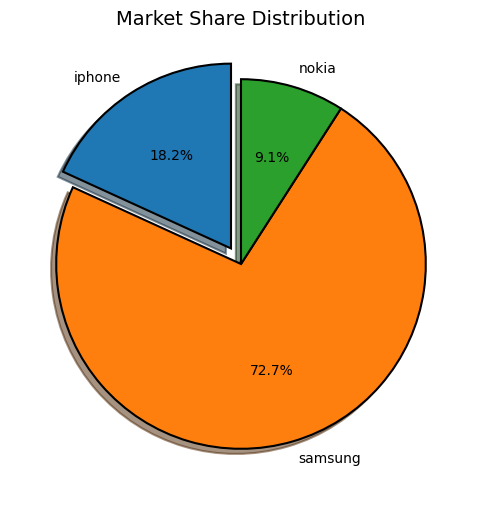

In [55]:
# Run the function to generate the video
create_scenario_based_infographic_video()
print("Infographic video created successfully!")